In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import seaborn as sn
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import time
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML lab 01/train.csv')
valid = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML lab 01/valid.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML lab 01/test.csv')

In [5]:
X_train = train.iloc[:, :-4]
y_train = train.iloc[:, -4:]
X_val = valid.iloc[:, :-4]
y_val = valid.iloc[:, -4:]
X_test = test.iloc[:, :-4]
y_test = test.iloc[:, -4:]

In [6]:
X_train.head()
y_test.head()
X_test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
0,-1.141206,-0.279703,1.019681,2.605902,0.460391,-1.167380,-1.149165,-1.205164,2.468966,-2.729526,...,1.670388,-0.355608,-0.342747,-0.102831,-0.868282,-0.429783,0.438561,-1.625122,0.599944,-0.615575
1,-1.796767,-0.056758,0.771219,4.414086,-1.229059,1.732098,0.063241,-0.126311,1.322355,-3.461282,...,1.136570,0.826741,-0.371280,-1.492272,0.227806,0.209200,2.200402,-1.701029,1.163999,-1.570136
2,-1.388968,-0.418296,0.186543,2.803852,-1.499095,1.395180,0.739648,0.274060,1.228789,-3.081147,...,0.343188,-0.243809,0.462302,-1.511495,-0.692679,0.449235,1.377531,-1.854203,-0.040538,-2.164104
3,1.276844,-0.112323,-0.310796,2.251175,0.283670,-0.581020,-0.024439,-0.306097,2.424685,-1.714863,...,3.057573,-0.632902,1.511204,-0.658826,-0.690499,-1.077949,0.930102,-2.758352,-0.246738,-1.389013
4,-1.560815,-0.168494,1.249770,1.869219,-1.646049,0.132156,-0.664602,0.483327,1.728020,-2.258071,...,1.217447,-0.374313,1.280207,-1.546299,-0.510597,1.213396,2.497490,-1.597984,-0.163483,-1.735939


In [7]:
svm = SVC(kernel='linear')
def svm_classifier(X_train, Y_train, X_val, Y_val):
    svm.fit(X_train, Y_train)

    y_pred = svm.predict(X_val)

    accuracy = accuracy_score(Y_val, y_pred)
    return accuracy

In [8]:
knn = KNeighborsClassifier(n_neighbors=1)
def knn_classifier(X_train, Y_train, X_val, Y_val):

    knn.fit(np.array(X_train), Y_train)

    y_pred = knn.predict(np.array(X_val))

    accuracy = accuracy_score(Y_val, y_pred)
    return accuracy

In [9]:
logreg = LogisticRegression()
def logistic_regression_classifier(X_train, Y_train, X_val, Y_val):

    logreg.fit(X_train, Y_train)

    y_pred = logreg.predict(X_val)

    accuracy = accuracy_score(Y_val, y_pred)
    return accuracy

Label 1

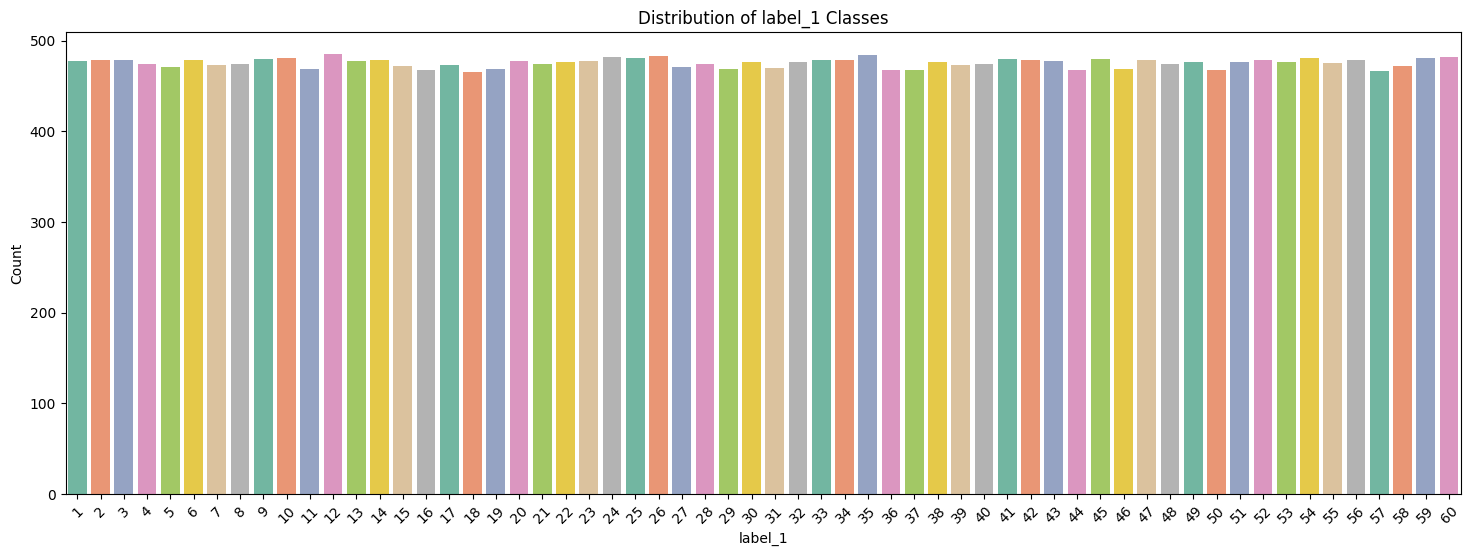

In [10]:
plt.figure(figsize=(18, 6))
sn.countplot(data=y_train, x='label_1', palette='Set2')
plt.title('Distribution of label_1 Classes')
plt.xlabel('label_1')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [11]:
# accuracy with all the features
#svm
start_time = time.time()
accuracy = svm_classifier(X_train, y_train['label_1'], X_val, y_val['label_1'] )
elapsed_time = time.time() - start_time
print(f"Accuracy: {accuracy * 100:.2f}% in {elapsed_time} secs")

Accuracy: 99.20% in 16.67271637916565 secs


In [12]:
# accuracy with all the features
#knn
start_time = time.time()
accuracy = knn_classifier(X_train, y_train['label_1'], X_val, y_val['label_1'] )
elapsed_time = time.time() - start_time
print(f"Accuracy: {accuracy * 100:.2f}% in {elapsed_time} secs")

Accuracy: 98.93% in 1.3849866390228271 secs


In [13]:
# accuracy with all the features
#logistic_regression_classifier
start_time = time.time()
accuracy = logistic_regression_classifier(X_train, y_train['label_1'], X_val, y_val['label_1'] )
elapsed_time = time.time() - start_time
print(f"Accuracy: {accuracy * 100:.2f}% in {elapsed_time} secs")

Accuracy: 99.20% in 21.48535466194153 secs


In [14]:
label_1_pred_before = knn.predict(np.array(X_test))

In [15]:
def pca_feature_selection(dataset, label, threshold=0.95):
    X = dataset.drop(columns=[label])
    y = dataset[label]

    # Drop rows with NaN values
    X = X.dropna()

    pca = PCA()
    X_pca = pca.fit_transform(X)

    explained_variance_ratio = pca.explained_variance_ratio_
    cum_explained_variance_ratio = np.cumsum(explained_variance_ratio)

    n_components = np.argmax(cum_explained_variance_ratio >= threshold) + 1

    selected_features = X.columns[:n_components].tolist()

    return selected_features

In [16]:
pca_features = pca_feature_selection(train, 'label_1', 0.7)
len(set(pca_features))

19

In [17]:
pca_features = pca_feature_selection(train, 'label_1', 0.98)
print(f"dropping features count {len(set(pca_features))}")
X_train_filtered = X_train.drop(columns=list(pca_features))
X_val_filtered = X_val.drop(columns=list(pca_features))
X_test_filtered = X_test.drop(columns=list(pca_features))
start_time = time.time()
accuracy = svm_classifier(X_train_filtered, y_train['label_1'], X_val_filtered, y_val['label_1'] )
elapsed_time = time.time() - start_time
print(f"Accuracy: {accuracy * 100:.2f}% in {elapsed_time} secs")

dropping features count 88
Accuracy: 98.53% in 13.026349067687988 secs


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_val_scaled = scaler.transform(X_val_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

In [19]:
start_time = time.time()
accuracy = svm_classifier(X_train_scaled, y_train['label_1'], X_val_scaled, y_val['label_1'] )
elapsed_time = time.time() - start_time
print(f"Accuracy: {accuracy * 100:.2f}% in {elapsed_time} secs")

Accuracy: 98.67% in 13.326210498809814 secs


In [20]:
X_train_scaled.shape

(28520, 168)

In [21]:
pca = PCA(n_components=80, svd_solver = 'full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [22]:
start_time = time.time()
accuracy = svm_classifier(X_train_pca, y_train['label_1'], X_val_pca, y_val['label_1'] )
elapsed_time = time.time() - start_time
print(f"Accuracy: {accuracy * 100:.2f}% in {elapsed_time} secs")

Accuracy: 97.33% in 10.310544967651367 secs


In [23]:
X_train_pca.shape

(28520, 80)

In [24]:
label_1_pred_after = svm.predict(np.array(X_test_pca))

In [25]:
label1_features = pd.DataFrame(data=X_test_pca, columns=[f'new_feature_{i+1}' for i in range(X_test_pca.shape[1])])
label1_features.insert(0,'Predicted labels before feature engineering',label_1_pred_before)
label1_features.insert(1,'Predicted labels after feature engineering', label_1_pred_after)
label1_features.insert(2,'No of new features', X_test_pca.shape[1])

Label 2

In [26]:
label2_train = train.copy()
label2_valid = valid.copy()
label2_test = test.copy()
label2_test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.141206,-0.279703,1.019681,2.605902,0.460391,-1.167380,-1.149165,-1.205164,2.468966,-2.729526,...,-0.868282,-0.429783,0.438561,-1.625122,0.599944,-0.615575,NaN,NaN,NaN,NaN
1,-1.796767,-0.056758,0.771219,4.414086,-1.229059,1.732098,0.063241,-0.126311,1.322355,-3.461282,...,0.227806,0.209200,2.200402,-1.701029,1.163999,-1.570136,NaN,NaN,NaN,NaN
2,-1.388968,-0.418296,0.186543,2.803852,-1.499095,1.395180,0.739648,0.274060,1.228789,-3.081147,...,-0.692679,0.449235,1.377531,-1.854203,-0.040538,-2.164104,NaN,NaN,NaN,NaN
3,1.276844,-0.112323,-0.310796,2.251175,0.283670,-0.581020,-0.024439,-0.306097,2.424685,-1.714863,...,-0.690499,-1.077949,0.930102,-2.758352,-0.246738,-1.389013,NaN,NaN,NaN,NaN
4,-1.560815,-0.168494,1.249770,1.869219,-1.646049,0.132156,-0.664602,0.483327,1.728020,-2.258071,...,-0.510597,1.213396,2.497490,-1.597984,-0.163483,-1.735939,NaN,NaN,NaN,NaN


In [27]:
label2_train = label2_train.dropna(subset=['label_2'])
label2_valid = label2_valid.dropna(subset=['label_2'])

In [28]:
X_train = label2_train.iloc[:, :-4]
y_train = label2_train.iloc[:, -3:]
X_val = label2_valid.iloc[:, :-4]
y_val = label2_valid.iloc[:, -3:]
X_test = label2_test.iloc[:, :-4]
y_test = label2_test.iloc[:, -3:]

In [29]:
X_test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
0,-1.141206,-0.279703,1.019681,2.605902,0.460391,-1.167380,-1.149165,-1.205164,2.468966,-2.729526,...,1.670388,-0.355608,-0.342747,-0.102831,-0.868282,-0.429783,0.438561,-1.625122,0.599944,-0.615575
1,-1.796767,-0.056758,0.771219,4.414086,-1.229059,1.732098,0.063241,-0.126311,1.322355,-3.461282,...,1.136570,0.826741,-0.371280,-1.492272,0.227806,0.209200,2.200402,-1.701029,1.163999,-1.570136
2,-1.388968,-0.418296,0.186543,2.803852,-1.499095,1.395180,0.739648,0.274060,1.228789,-3.081147,...,0.343188,-0.243809,0.462302,-1.511495,-0.692679,0.449235,1.377531,-1.854203,-0.040538,-2.164104
3,1.276844,-0.112323,-0.310796,2.251175,0.283670,-0.581020,-0.024439,-0.306097,2.424685,-1.714863,...,3.057573,-0.632902,1.511204,-0.658826,-0.690499,-1.077949,0.930102,-2.758352,-0.246738,-1.389013
4,-1.560815,-0.168494,1.249770,1.869219,-1.646049,0.132156,-0.664602,0.483327,1.728020,-2.258071,...,1.217447,-0.374313,1.280207,-1.546299,-0.510597,1.213396,2.497490,-1.597984,-0.163483,-1.735939


<Axes: xlabel='label_2', ylabel='Count'>

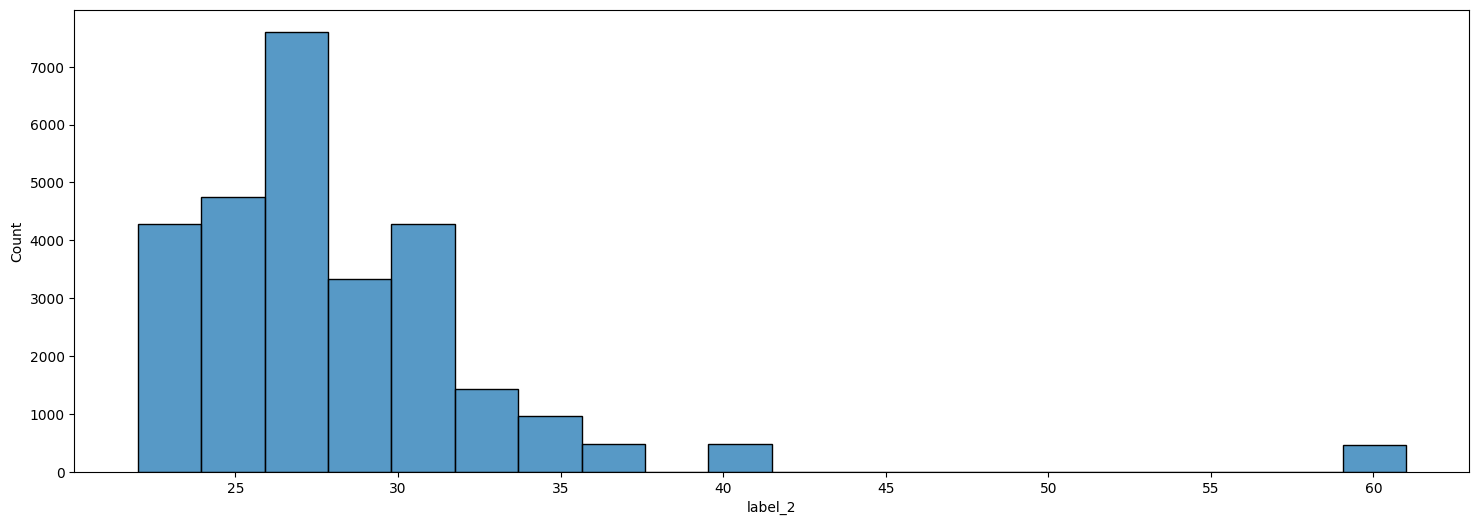

In [30]:
plt.figure(figsize=(18, 6))
sn.histplot(data=y_train, x='label_2', bins=20, kde=False)

In [31]:
# accuracy with all the features
#svm
start_time = time.time()
accuracy = svm_classifier(X_train, y_train['label_2'], X_val, y_val['label_2'] )
elapsed_time = time.time() - start_time
print(f"Accuracy: {accuracy * 100:.2f}% in {elapsed_time} secs")

Accuracy: 90.08% in 101.95894527435303 secs


In [32]:
# accuracy with all the features
#knn
start_time = time.time()
accuracy = knn_classifier(X_train, y_train['label_2'], X_val, y_val['label_2'] )
elapsed_time = time.time() - start_time
print(f"Accuracy: {accuracy * 100:.2f}% in {elapsed_time} secs")

Accuracy: 99.05% in 0.4796879291534424 secs


In [33]:
# accuracy with all the features
#logistic_regression_classifier
start_time = time.time()
accuracy = logistic_regression_classifier(X_train, y_train['label_2'], X_val, y_val['label_2'] )
elapsed_time = time.time() - start_time
print(f"Accuracy: {accuracy * 100:.2f}% in {elapsed_time} secs")

Accuracy: 78.53% in 7.044412851333618 secs


In [34]:
label_2_pred_before = knn.predict(np.array(X_test))

In [35]:
pca_features = pca_feature_selection(train, 'label_2', 0.999)
print(f"dropping features count {len(set(pca_features))}")
X_train_filtered = X_train.drop(columns=list(pca_features))
X_val_filtered = X_val.drop(columns=list(pca_features))
X_test_filtered = X_test.drop(columns=list(pca_features))
start_time = time.time()
accuracy = knn_classifier(X_train_filtered, y_train['label_2'], X_val_filtered, y_val['label_2'] )
elapsed_time = time.time() - start_time
print(f"Accuracy: {accuracy * 100:.2f}% in {elapsed_time} secs")

dropping features count 149
Accuracy: 98.51% in 0.27832579612731934 secs


In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_val_scaled = scaler.transform(X_val_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

In [37]:
start_time = time.time()
accuracy = knn_classifier(X_train_scaled, y_train['label_2'], X_val_scaled, y_val['label_2'] )
elapsed_time = time.time() - start_time
print(f"Accuracy: {accuracy * 100:.2f}% in {elapsed_time} secs")

Accuracy: 98.51% in 0.2439119815826416 secs


In [38]:
X_train_scaled.shape

(28040, 107)

In [39]:
pca = PCA(n_components=38, svd_solver = 'full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [40]:
start_time = time.time()
accuracy = knn_classifier(X_train_pca, y_train['label_2'], X_val_pca, y_val['label_2'] )
elapsed_time = time.time() - start_time
print(f"Accuracy: {accuracy * 100:.2f}% in {elapsed_time} secs")

Accuracy: 97.28% in 0.2245943546295166 secs


In [41]:
X_train_pca.shape

(28040, 38)

In [42]:
label_2_pred_after = knn.predict(np.array(X_test_pca))

In [43]:
label2_features = pd.DataFrame(data=X_test_pca, columns=[f'new_feature_{i+1}' for i in range(X_test_pca.shape[1])])
label2_features.insert(0,'Predicted labels before feature engineering',label_2_pred_before)
label2_features.insert(1,'Predicted labels after feature engineering', label_2_pred_after)
label2_features.insert(2,'No of new features', X_test_pca.shape[1])

Label 3

In [44]:
label3_train = train.copy()
label3_valid = valid.copy()
label3_test = test.copy()

In [45]:
X_train = label3_train.iloc[:, :-4]
y_train = label3_train.iloc[:, -2:]
X_val = label3_valid.iloc[:, :-4]
y_val = label3_valid.iloc[:, -2:]
X_test = label3_test.iloc[:, :-4]
y_test = label3_test.iloc[:, -2:]

In [46]:
ros = RandomOverSampler(random_state=0, sampling_strategy=0.75)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train['label_3'])

In [47]:
y_train_resampled

0        1
1        1
2        1
3        1
4        1
        ..
39888    0
39889    0
39890    0
39891    0
39892    0
Name: label_3, Length: 39893, dtype: int64

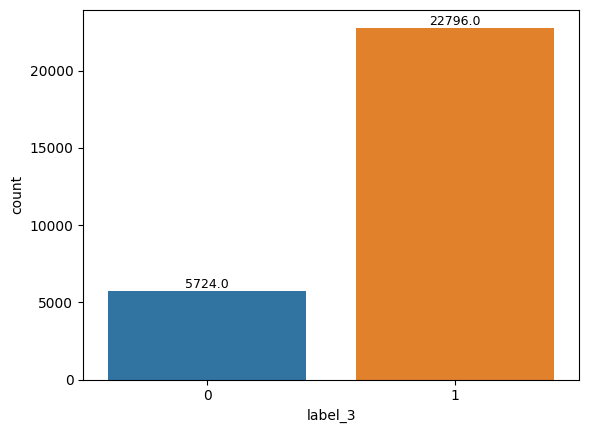

In [48]:
ax = sn.countplot(x=y_train['label_3'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black')

In [49]:
# accuracy with all the features
#svm
start_time = time.time()
accuracy = svm_classifier(X_train_resampled, y_train_resampled, X_val, y_val['label_3'] )
elapsed_time = time.time() - start_time
print(f"Accuracy: {accuracy * 100:.2f}% in {elapsed_time} secs")

Accuracy: 99.87% in 3.94707989692688 secs


In [50]:
# accuracy with all the features
#knn
start_time = time.time()
accuracy = knn_classifier(X_train_resampled, y_train_resampled, X_val, y_val['label_3'] )
elapsed_time = time.time() - start_time
print(f"Accuracy: {accuracy * 100:.2f}% in {elapsed_time} secs")

Accuracy: 100.00% in 0.657118558883667 secs


In [51]:
# accuracy with all the features
#logistic_regression_classifier
start_time = time.time()
accuracy = logistic_regression_classifier(X_train_resampled, y_train_resampled, X_val, y_val['label_3'] )
elapsed_time = time.time() - start_time
print(f"Accuracy: {accuracy * 100:.2f}% in {elapsed_time} secs")

Accuracy: 100.00% in 1.6674139499664307 secs


In [52]:
label_3_pred_before = knn.predict(np.array(X_test))

In [53]:
pca_features = pca_feature_selection(train, 'label_3', 0.99996)
print(f"dropping features count {len(set(pca_features))}")
X_train_filtered = X_train_resampled.drop(columns=list(pca_features))
X_val_filtered = X_val.drop(columns=list(pca_features))
X_test_filtered = X_test.drop(columns=list(pca_features))
start_time = time.time()
accuracy = logistic_regression_classifier(X_train_filtered, y_train_resampled, X_val_filtered, y_val['label_3'] )
elapsed_time = time.time() - start_time
print(f"Accuracy: {accuracy * 100:.2f}% in {elapsed_time} secs")

dropping features count 231
Accuracy: 98.13% in 0.30768656730651855 secs


In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_val_scaled = scaler.transform(X_val_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

In [55]:
X_train_scaled.shape

(39893, 25)

In [56]:
label_3_pred_after = logreg.predict(np.array(X_test_scaled))

In [57]:
label3_features = pd.DataFrame(data=X_test_pca, columns=[f'new_feature_{i+1}' for i in range(X_test_pca.shape[1])])
label3_features.insert(0,'Predicted labels before feature engineering',label_3_pred_before)
label3_features.insert(1,'Predicted labels after feature engineering', label_3_pred_after)
label3_features.insert(2,'No of new features', X_test_pca.shape[1])

Label 4

In [58]:
label4_train = train.copy()
label4_valid = valid.copy()
label4_test = test.copy()

In [59]:
X_train = label4_train.iloc[:, :-4]
y_train = label4_train.iloc[:, -1:]
X_val = label4_valid.iloc[:, :-4]
y_val = label4_valid.iloc[:, -1:]
X_test = label4_test.iloc[:, :-4]
y_test = label4_test.iloc[:, -1:]

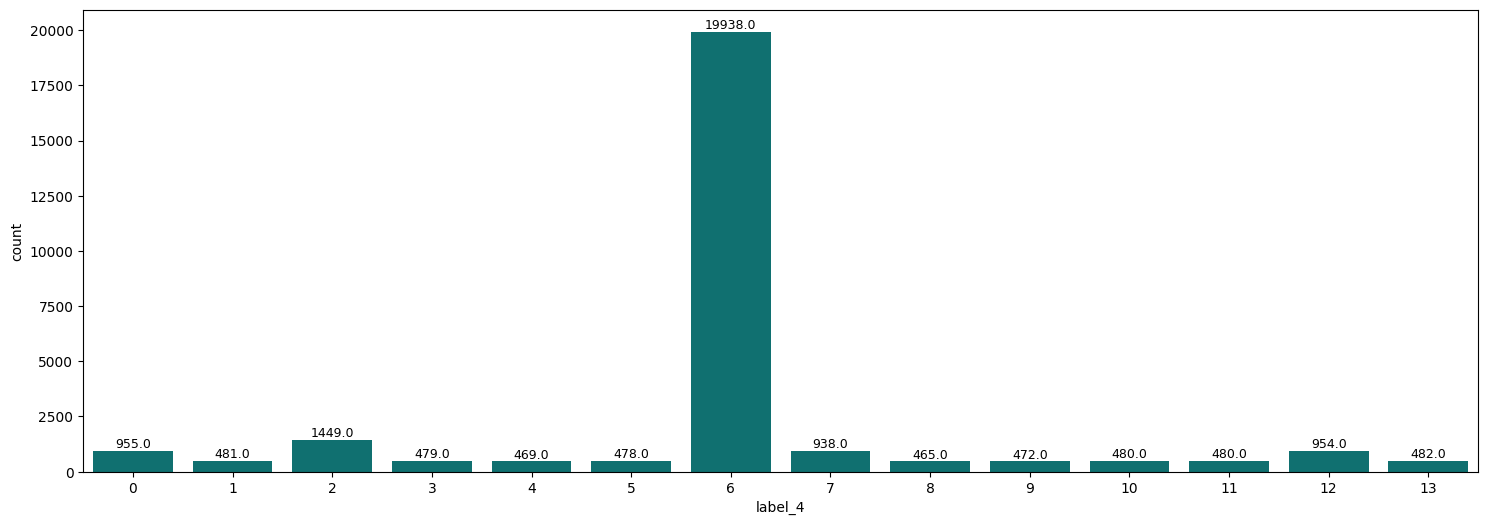

In [60]:
plt.figure(figsize=(18, 6))
ax = sn.countplot(x=y_train['label_4'], color='teal')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black')

In [61]:
# accuracy with all the features
#knn
start_time = time.time()
accuracy = knn_classifier(X_train_resampled, y_train_resampled, X_val, y_val['label_4'] )
elapsed_time = time.time() - start_time
print(f"Accuracy: {accuracy * 100:.2f}% in {elapsed_time} secs")

Accuracy: 1.47% in 1.2389225959777832 secs


In [62]:
label_4_pred_before = knn.predict(np.array(X_test))

In [63]:
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train['label_4'])

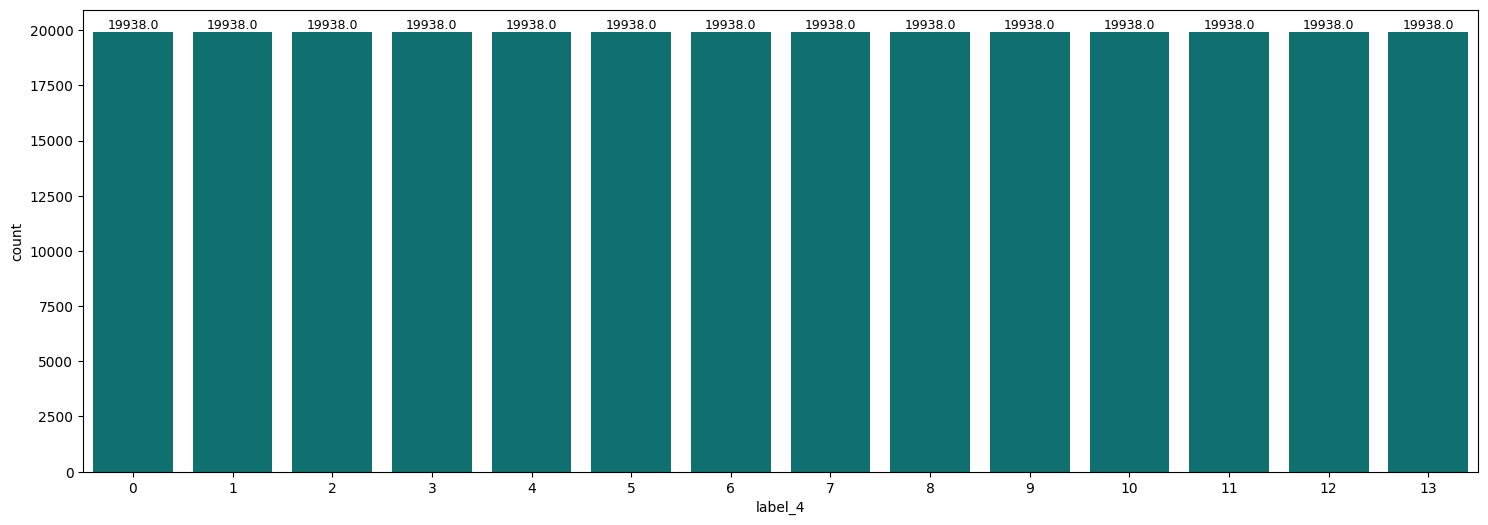

In [64]:
plt.figure(figsize=(18, 6))
ax = sn.countplot(x=y_train_resampled, color='teal')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black')

In [65]:
# accuracy with all the features
#svm
start_time = time.time()
accuracy = svm_classifier(X_train_resampled, y_train_resampled, X_val, y_val['label_4'] )
elapsed_time = time.time() - start_time
print(f"Accuracy: {accuracy * 100:.2f}% in {elapsed_time} secs")

Accuracy: 94.53% in 746.5137078762054 secs


In [66]:
# accuracy with all the features
#knn
start_time = time.time()
accuracy = knn_classifier(X_train_resampled, y_train_resampled, X_val, y_val['label_4'] )
elapsed_time = time.time() - start_time
print(f"Accuracy: {accuracy * 100:.2f}% in {elapsed_time} secs")

Accuracy: 99.60% in 5.753143310546875 secs


In [67]:
# accuracy with all the features
#logistic_regression_classifier
start_time = time.time()
accuracy = logistic_regression_classifier(X_train_resampled, y_train_resampled, X_val, y_val['label_4'] )
elapsed_time = time.time() - start_time
print(f"Accuracy: {accuracy * 100:.2f}% in {elapsed_time} secs")

Accuracy: 89.20% in 64.21622657775879 secs


In [68]:
pca_features = pca_feature_selection(train, 'label_4', 0.9999)
print(f"dropping features count {len(set(pca_features))}")
X_train_filtered = X_train_resampled.drop(columns=list(pca_features))
X_val_filtered = X_val.drop(columns=list(pca_features))
X_test_filtered = X_test.drop(columns=list(pca_features))
start_time = time.time()
accuracy = knn_classifier(X_train_filtered, y_train_resampled, X_val_filtered, y_val['label_4'] )
elapsed_time = time.time() - start_time
print(f"Accuracy: {accuracy * 100:.2f}% in {elapsed_time} secs")

dropping features count 212
Accuracy: 97.07% in 2.610830068588257 secs


In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_val_scaled = scaler.transform(X_val_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

In [70]:
X_train_scaled.shape

(279132, 44)

In [71]:
pca = PCA(n_components=36, svd_solver = 'full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [72]:
X_train_pca.shape

(279132, 36)

In [73]:
start_time = time.time()
accuracy = knn_classifier(X_train_pca, y_train_resampled, X_val_pca, y_val['label_4'] )
elapsed_time = time.time() - start_time
print(f"Accuracy: {accuracy * 100:.2f}% in {elapsed_time} secs")

Accuracy: 97.07% in 1.2754392623901367 secs


Save Output to CSV

In [74]:
label_4_pred_after = knn.predict(np.array(X_test_pca))

In [75]:
label4_features = pd.DataFrame(data=X_test_pca, columns=[f'new_feature_{i+1}' for i in range(X_test_pca.shape[1])])
label4_features.insert(0,'Predicted labels before feature engineering',label_4_pred_before)
label4_features.insert(1,'Predicted labels after feature engineering', label_4_pred_after)
label4_features.insert(2,'No of new features', X_test_pca.shape[1])

In [79]:
def write_csv(feature_df, label):
  dir_name = 'output'
  if not os.path.exists(dir_name):
    os.makedirs(dir_name)
  for i in range(feature_df['No of new features'][0], 256):
        feature_df[f'new_feature_{i+1}'] = [''] * (feature_df.shape[0])
  filename = f'output/190544E_label_{label}.csv'
  feature_df.to_csv(filename, index=False)

In [80]:
write_csv(label1_features.copy(), 1)
write_csv(label2_features.copy(), 2)
write_csv(label3_features.copy(), 3)
write_csv(label4_features.copy(), 4)